In [1]:
for i in (47,51,45):
    print(i)
    

47
51
45


In [1]:
# Imports
import numpy as np
import os
import matplotlib.image as mpimg
import torch
from torch.distributions import Normal
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision.utils import make_grid
import torchvision.transforms as transforms
from tqdm import tqdm
from torchvision.utils import save_image
import torchvision.datasets as datasets
from keras.datasets import mnist
from torch.utils.data import Dataset
import torch




In [6]:
def loadTissueData(path_to_file):
    '''
    Read image intensity, multiclass-segmentations, and PD, T1, T2 (tissue properties)
    for multi-slice SAX images of the ACDC dataset
    dimensions are : [1,N_slices,Nx,Ny]

    all cases are have been previously resampled to 1x1 mm in-plane resolution and 10 mm slice thickness
    '''

    data = np.load(path_to_file)
    image = data['image']
    multiClass = data['multiClassMasks']
    PD = data['PD']
    T1 = data['T1']
    T2 = data['T2']

    return image,multiClass,PD,T1,T2

def loadLVOnly(path_to_file):
    '''
    Read only LV segmentation masks
    '''

    multiClass = np.load(path_to_file)['multiClassMasks']
    LV_mask = 1*(multiClass == 3)
    return LV_mask

def load_mask(path_to_file, i):
    '''
    Read out channel i only from the data
    '''

    multiClass = np.load(path_to_file)['multiClassMasks']
    mask = 1*(multiClass == i)
    return mask

slices_images,multiClass, PD, T1, T2 = loadTissueData("./npzdata/patient090.npz")

LV_mask = loadLVOnly("./npzdata/patient090.npz")




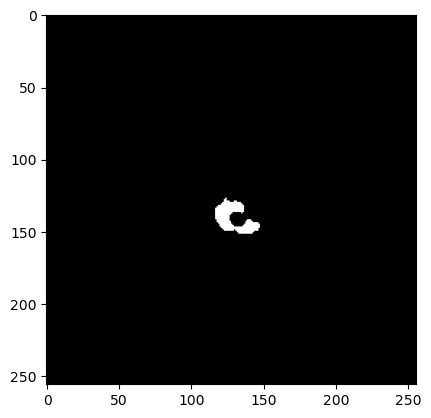

In [11]:
plt.imshow(LV_mask[11,6,:,:], cmap='gray')

In [ ]:
from matplotlib.path import Path


def get_multichannel_data():
    


    for i in range (67,69):
        path = f'../npzdata/patient0{i}.npz'
        
        multi_channel = loadLVOnly(path_to_file=path)
        nr_of_images = multi_channel.shape[0] * multi_channel.shape[1]

        multi_channel = multi_channel.reshape(1,nr_of_images, 256, 256)

        print(f'Number of images: {nr_of_images}')

        for j in range(2,12):
            channel = load_mask(path, j)
            #print(f'Channel {j} shape: {channel.shape}')
            channel = channel.reshape(1,nr_of_images, 256, 256)
            multi_channel = np.concatenate((multi_channel, channel), axis=0)
            print(f'Multi channel shape: {multi_channel.shape}')

        if(i==67):
            all_multi_channel = multi_channel
            print(f'Multi channel data shape i = 67: {all_multi_channel.shape}')
        else:
            all_multi_channel= np.concatenate((all_multi_channel, multi_channel), axis=1)
            print(f'Multi channel data shape at end of j loop: {all_multi_channel.shape}')
        
        # turn numpy into torch tensor
    
    print(f'Multi channel shape final: {all_multi_channel.shape}')
    for i in range(11):
        
        all_multi_channel = torch.from_numpy(all_multi_channel)
        all_multi_channel = all_multi_channel.type(torch.float32)

    return all_multi_channel





In [ ]:
multi_channel_data = torch.empty(())

multi_channel_data =get_multichannel_data()



Number of images: 300
Multi channel shape: (2, 300, 256, 256)
Multi channel shape: (3, 300, 256, 256)
Multi channel shape: (4, 300, 256, 256)
Multi channel shape: (5, 300, 256, 256)
Multi channel shape: (6, 300, 256, 256)
Multi channel shape: (7, 300, 256, 256)
Multi channel shape: (8, 300, 256, 256)
Multi channel shape: (9, 300, 256, 256)
Multi channel shape: (10, 300, 256, 256)
Multi channel shape: (11, 300, 256, 256)
Multi channel data shape i = 67: (11, 300, 256, 256)
Number of images: 196
Multi channel shape: (2, 196, 256, 256)
Multi channel shape: (3, 196, 256, 256)
Multi channel shape: (4, 196, 256, 256)
Multi channel shape: (5, 196, 256, 256)
Multi channel shape: (6, 196, 256, 256)
Multi channel shape: (7, 196, 256, 256)
Multi channel shape: (8, 196, 256, 256)
Multi channel shape: (9, 196, 256, 256)
Multi channel shape: (10, 196, 256, 256)
Multi channel shape: (11, 196, 256, 256)
Multi channel data shape at end of j loop: (11, 496, 256, 256)
Multi channel shape final: (11, 496,

TypeError: expected np.ndarray (got Tensor)

In [ ]:
type(multi_channel_data)
multi_channel_data.size()[1]
multi_channel_data_shuffled = multi_channel_data

In [ ]:
for i in range(11):
    multi_channel_data_shuffled[i,:,:,:] = multi_channel_data_shuffled

In [ ]:
training_data = training_data[torch.randperm(training_data.size()[0])]

In [ ]:
multi_channel_data_shuffled.shape


In [ ]:


print(multi_channel_data.shape)

image = plt.imshow(multi_channel_data[4,10,:,:])

In [ ]:
print(multi_channel_data_shuffled.shape)

image = plt.imshow(multi_channel_data_shuffled[4,,:,:])

tests


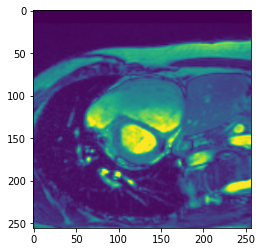

(12, 7, 256, 256)
(12, 7, 256, 256)


In [41]:
#reshape masks into one array including all 6 timeframes for 17 slices -> 102 masks per screening
image_raw,_,_,_,_ = loadTissueData("../npzdata/patient090.npz")



image = plt.imshow(image_raw[0][0])

print("tests")



plt.show()


print(np.shape(LV_mask))

print (image_raw.shape)


In [42]:
image = plt.imshow(LV_mask[6][6])

TypeError: Invalid shape (7, 256, 256) for image data

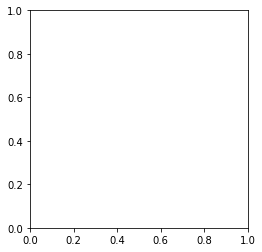

In [43]:
plt.imshow(multiClass[0])

np.unique(multiClass[0][20])

In [ ]:
os.getcwd()

In [ ]:
class MaskData(Dataset):
    """
    Creates a MAP-style PyTorch Dataset. Can query the dataset via index. 
    
    adapt __getitem__ and __len__ methods for newly defined data type
    """
    def __init__(self, path):
        # load the data into memory
        # generally speaking you don't want to do this -> in our case not too much data so ok approach for now
        self.images, self.ground_truth = torch.load(path)

    def __getitem__(self, idx):
        """
        Returns image with index idx.
        """
        x = self.images[idx].float()
        x = torch.Tensor(x) #utilising torch tensor!
        x = torch.flatten(x) # "flatten" the image from (256x256) to (65'563)
        return x
    
    def __len__(self):
        """
        Returns the length of the dataset
        """
        return len(self.ground_truth)

In [ ]:
image

In [ ]:
def reshape(x):
    #Reshaping the data into 102 slices of 256x256 
    return x.reshape(102,256,256)

In [ ]:
def concatenate(input):
    #concatenate all the input iamges together in the shape of 256x256 
    return np.concatenate(input, axis=0)

In [ ]:
LV_mask = torch.from_numpy(LV_mask.reshape(102,256,256))


In [ ]:
print(type(LV_mask), LV_mask[0].size())

In [ ]:
plt.imshow(  LV_mask[:,:,0].permute(1, 2, 0)  )


In [ ]:
print(type(LV_mask))
plt.imshow(LV_mask[0])

plt.imshow(np.random)

In [211]:
LV_mask_train = loadLVOnly(f'../npzdata/patient065.npz')
numberOfImages=(LV_mask_train.shape[0] * LV_mask_train.shape[1])
LV_mask_train = LV_mask_train.reshape(numberOfImages,256,256)
print(LV_mask_train.shape)

(240, 256, 256)


In [212]:
for i in range(90,100):
    if(i==84 or i == 88):
        continue;
        
    LV_mask = loadLVOnly(f'../npzdata/patient0{i}.npz')
   
    print(LV_mask.shape[0], LV_mask.shape[1])
    
    numberOfImages=(LV_mask.shape[0] * LV_mask.shape[1])
    if numberOfImages == 13: 
        print(f'fucked at {i}')
    

    LV_mask = LV_mask.reshape(numberOfImages,256,256)
    
    LV_mask_train =np.concatenate((LV_mask_train,LV_mask) )
    


    

12 7
16 8
15 15
30 10
14 10
30 14
15 18
30 8
22 7
19 16


In [213]:
LV_mask_train1 = loadLVOnly(f'../npzdata/patient065.npz')
numberOfImages=(LV_mask_train1.shape[0] * LV_mask_train1.shape[1])
LV_mask_train1 = LV_mask_train1.reshape(numberOfImages,256,256)
print(LV_mask_train1.shape)

(240, 256, 256)


In [214]:
for i in range(90,100):
    if(i==84 or i == 88):
        continue;
        
    LV_mask = loadLVOnly(f'../npzdata/patient0{i}.npz')
   
    print(LV_mask.shape[0], LV_mask.shape[1])
    
    numberOfImages=(LV_mask.shape[0] * LV_mask.shape[1])
    if numberOfImages == 13: 
        print(f'fucked at {i}')
    

    LV_mask = LV_mask.reshape(numberOfImages,256,256)
    
    LV_mask_train1 =np.concatenate((LV_mask_train,LV_mask) )
    


    

12 7
16 8
15 15
30 10
14 10
30 14
15 18
30 8
22 7
19 16


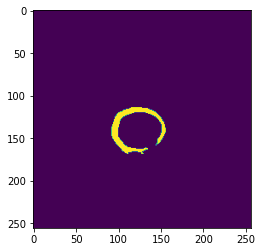

In [215]:
plt.imshow(LV_mask_train[5])





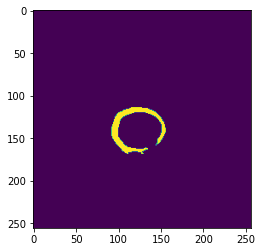

In [216]:
plt.imshow(LV_mask_train1[5])



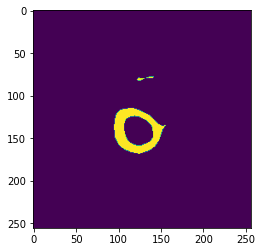

In [217]:
plt.imshow(LV_mask_train_permuted[16])

In [222]:
import random
np.random.seed(4)



In [226]:
np.random.shuffle(LV_mask_train)
np.random.shuffle(LV_mask_train1)

In [227]:
plt.imshow(LV_mask_train[16])

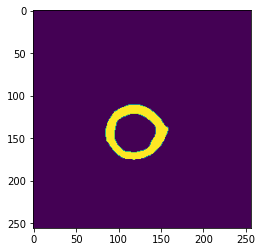

In [228]:
plt.imshow(LV_mask_train1[16])

In [ ]:
LV_mask_test = loadLVOnly(f'../npzdata/patient041.npz')
numberOfImages=(LV_mask_test.shape[0] * LV_mask_test.shape[1])
LV_mask_test = torch.from_numpy(LV_mask_test.reshape(numberOfImages,256,256))

LV_mask_test1 = loadLVOnly(f'../npzdata/patient047.npz')
numberOfImages1=(LV_mask_test1.shape[0] * LV_mask_test1.shape[1])
LV_mask_test1 = torch.from_numpy(LV_mask_test1.reshape(numberOfImages1,256,256))

LV_mask_test2 = loadLVOnly(f'../npzdata/patient052.npz')
numberOfImages2=(LV_mask_test2.shape[0] * LV_mask_test2.shape[1])
LV_mask_test2 = torch.from_numpy(LV_mask_test2.reshape(numberOfImages2,256,256))



LV_mask_test = torch.cat((LV_mask_test,LV_mask_test1))
LV_mask_test =torch.cat((LV_mask_test, LV_mask_test2))

LV_mask_test = torch.unsqueeze(LV_mask_test,1)



print(LV_mask_test.shape)
"""
LV_mask_test1 = loadLVOnly(f'../npzdata/patient047.npz')
LV_mask_test2 = loadLVOnly(f'../npzdata/patient052.npz')
LV_mask_test3 = loadLVOnly(f'../npzdata/patient053.npz')
LV_mask_test4 = loadLVOnly(f'../npzdata/patient055.npz')
LV_mask_test5 = loadLVOnly(f'../npzdata/patient057.npz')
LV_mask_test6 = loadLVOnly(f'../npzdata/patient058.npz')
LV_mask_test7 = loadLVOnly(f'../npzdata/patient060.npz')
LV_mask_test8 = loadLVOnly(f'../npzdata/patient065.npz')
LV_mask_test9 = loadLVOnly(f'../npzdata/patient100.npz')

for i in range(1,11):
    print(i)
    
    numberOfImages=(LV_mask_test{i}.shape[0] * LV_mask_test{i}.shape[1])
    
    LV_mask_test = torch.from_numpy(LV_mask.reshape(numberOfImages,256,256))
    print(LV_mask.shape)
    LV_mask_test =torch.cat((LV_mask_test,LV_mask_test{i}) )
    
"""

In [ ]:
LV_mask_train.shape

In [ ]:
img = np.array(LV_mask[0])

# find number of channels
if img.ndim == 2:
    channels = 1
    print("image has 1 channel")
else:
    channels = image.shape[-1]
    print("image has", channels, "channels")

In [ ]:
LV_mask_train[0][1][1].dtype

In [ ]:
LV_mask_train.type(torch.LongTensor).dtype

In [ ]:
LV_mask_train.shape


In [ ]:
LV_mask_train[]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 500, 30

x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x,50, density=True, facecolor='b')


plt.xlabel('value')
plt.ylabel('Probability')
plt.title('Latentspace Representations z')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.grid(True)
plt.show()

In [ ]:

z_all =  torch.empty(444,16).type(torch.float32)
print(z)

for i in range(16):
    mu, sigma = 100, 15
    x = mu + sigma * np.random.randn(64)
    z[:,i]= x

print(z)
plt.figure(figsize=(10, 7))
for i in range(16):
    plt.subplot(4, 4, i+1)
    n, bins, patches = plt.hist(z[:,i], 50, density=True, facecolor='g', alpha=0.75)
    plt.xlabel(f'Latent Variable {i+1}')
    plt.ylabel('Probability')

In [ ]:
# shape in latent space: torch.Size([64, 16]), z type: torch.float32

In [24]:
#plot a random numpy with size 256x256 and 1 channel in color red with legend name "random"
def channel_name(channel):
    """ Set the name of the channels"""
    if channel == 0:
        return 'tab:red'
    elif channel == 1:
        return 'blue'
    elif channel == 2:
        return 'green'
    elif channel == 3:
        return 'yellow'

temp = np.random.rand(256,256)
batch_size = 4
for j in range (batch_size):
    # plot the recon images and the original true labels over them with a transparency of 0.5 in green
    plt.subplot(int(batch_size/2), int(batch_size/2), j+1)
    plt.plot(temp,color = channel_name(j))


In [ ]:
### testing for the reconstruction of the 11 channel split up wroks

In [ ]:
#final_image += (recon_images[k,i,:,:].cpu().detach().numpy() * (i+1))

In [24]:
#torch insert testing
z = torch.zeros((50,4))
z_lv= torch.ones((16,4))
z_background = torch.ones(34,4) *2

z[34:50,:] = z_lv
z[0:34,:] = z_background
print("between")
print(z)

between
tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
    